# Machine Learning
#### Semester: Spring 2020
Ana Claudia Alferes (M20190932)

In [1]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('train.csv')

In [1105]:
data.describe(include="all").T

count unique       top  freq        mean       std        min  \
Employee_ID     5200    NaN       NaN   NaN  1.0026e+06   1501.26      1e+06   
Gender          5200      2      male  3900         NaN       NaN        NaN   
Age             5191    NaN       NaN   NaN     33.5384   6.03924         18   
Days_off        5192    NaN       NaN   NaN     6.81414   3.35516          2   
Rotations       5198    NaN       NaN   NaN    0.868796  0.421776          0   
Satis_leader    5198    NaN       NaN   NaN    0.828744  0.722553  0.0911854   
Satis_team      5199    NaN       NaN   NaN    0.897148  0.559963      0.144   
Emails          5200    NaN       NaN   NaN     30.7845   17.5826          1   
Tenure          5200    NaN       NaN   NaN     12.7097   6.20015   0.657534   
Bonus           5200    NaN       NaN   NaN    0.471646  0.298981     -0.289   
Distance        5191    NaN       NaN   NaN     3.21898  0.159722       2.74   
Kids            5196    NaN       NaN   NaN    0.546574  0.500573          0   
Overtime        5200    NaN       NaN   NaN     10.4805   1.18546          8   
Marital_status  5200      4  together  3892         NaN       NaN        NaN   
Department      5200      6     sales  1985         NaN       NaN        NaN   
Churn_risk      5200      3    medium  3129         NaN       NaN        NaN   

                       25%         50%         75%         max  
Employee_ID     1.0013e+06  1.0026e+06  1.0039e+06  1.0052e+06  
Gender                 NaN         NaN         NaN         NaN  
Age                     30          33          35          73  
Days_off                 5           6           8          32  
Rotations                1           1           1           4  
Satis_leader      0.273556    0.455927      1.2462          10  
Satis_team           0.608       0.752        1.04       9.776  
Emails                  17          29          42       146.5  
Tenure             8.43836     13.0411     17.0959     40.1644  
Bonus                0.239        0.49       0.692       4.898  
Distance              3.11        3.21        3.32        4.01  
Kids                     0           1           1           2  
Overtime               9.5        10.3        11.3        14.2  
Marital_status         NaN         NaN         NaN         NaN  
Department             NaN         NaN         NaN         NaN  
Churn_risk             NaN         NaN         NaN         NaN

In [1106]:
data.isnull().sum()

Employee_ID       0
Gender            0
Age               9
Days_off          8
Rotations         2
Satis_leader      2
Satis_team        1
Emails            0
Tenure            0
Bonus             0
Distance          9
Kids              4
Overtime          0
Marital_status    0
Department        0
Churn_risk        0
dtype: int64

In [17]:
data_num = data.loc[:,["Age","Days_off","Rotations","Satis_leader","Satis_team","Tenure","Emails","Bonus","Distance","Kids","Overtime"]]

imputer = KNNImputer(n_neighbors=2)
data_filled = pd.DataFrame(imputer.fit_transform(data_num), columns=["Age","Days_off","Rotations","Satis_leader","Satis_team","Tenure","Emails","Bonus","Distance","Kids","Overtime"])

data = pd.concat([data_filled, (data.loc[:,["Gender","Marital_status","Department","Churn_risk"]]).reset_index(drop=True)], axis=1)

data["DummyGender"] = data.Gender.apply(lambda x: 1 if x=="male" else 0) #Male = 1 , Female = 0

le = preprocessing.LabelEncoder()
le.fit(data['Marital_status'])
data["encoded_Marital"] = le.transform(data['Marital_status'])

le = preprocessing.LabelEncoder()
le.fit(data['Department'])
data["encoded_Department"] = le.transform(data['Department'])

le = preprocessing.LabelEncoder()
le.fit(data['Churn_risk'])
data["encoded_Churn"] = le.transform(data['Churn_risk'])

data['log_Satis_leader'] = np.log(data['Satis_leader'] )

data['log_Satis_team'] = np.log(data['Satis_team'] )

data_num = data.loc[:,["Age","Days_off","Rotations","Satis_leader","Satis_team","Tenure","Emails","Bonus","Distance","Kids","Overtime"]]

In [18]:
data.columns.values

array(['Age', 'Days_off', 'Rotations', 'Satis_leader', 'Satis_team',
       'Tenure', 'Emails', 'Bonus', 'Distance', 'Kids', 'Overtime',
       'Gender', 'Marital_status', 'Department', 'Churn_risk',
       'DummyGender', 'encoded_Marital', 'encoded_Department',
       'encoded_Churn', 'log_Satis_leader', 'log_Satis_team'],
      dtype=object)

In [19]:
data.head()

Age  Days_off  Rotations  Satis_leader  Satis_team     Tenure  Emails  \
0  38.0       6.0        1.0      0.364742       0.832   1.095890     4.0   
1  37.0       8.0        1.0      0.379939       1.280  13.369863    26.0   
2  36.0       6.0        1.0      0.303951       1.104  14.684932    29.0   
3  27.0       5.0        1.0      0.273556       0.624  11.506849    30.0   
4  30.0       8.0        1.0      0.212766       2.272   7.561644     5.0   

   Bonus  Distance  Kids  ...  Gender Marital_status         Department  \
0  0.356      3.33   1.0  ...  female        married  computer services   
1  0.801      3.22   1.0  ...  female        married    human resources   
2  0.382      3.11   1.0  ...    male        married           finances   
3 -0.005      3.48   1.0  ...    male       together  computer services   
4  0.260      3.14   1.0  ...    male       together              sales   

  Churn_risk DummyGender  encoded_Marital  encoded_Department  encoded_Churn  \
0     medium           0                0                   1              2   
1        low           0                0                   3              1   
2        low           1                0                   2              1   
3     medium           1                2                   1              2   
4        low           1                2                   5              1   

   log_Satis_leader  log_Satis_team  
0         -1.008566       -0.183923  
1         -0.967744        0.246860  
2         -1.190888        0.098940  
3         -1.296248       -0.471605  
4         -1.547563        0.820661  

[5 rows x 21 columns]

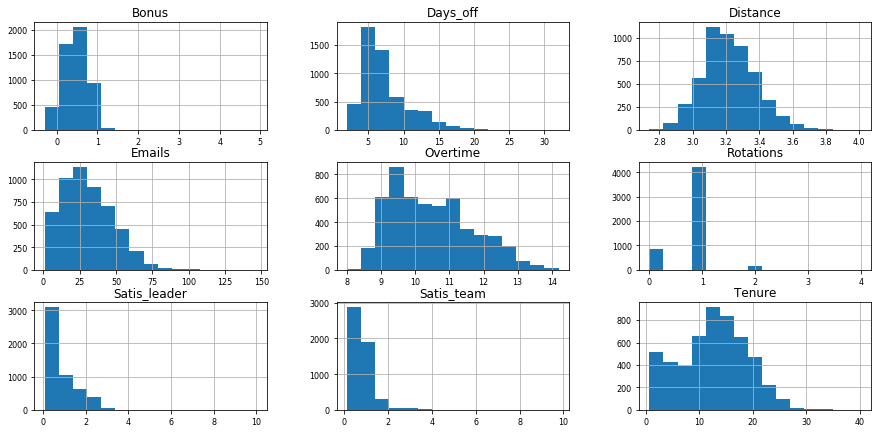

In [20]:
data_num = data.loc[:,["Days_off","Rotations","Satis_leader","Satis_team","Emails","Tenure","Bonus","Distance","Overtime"]]
data_num.hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

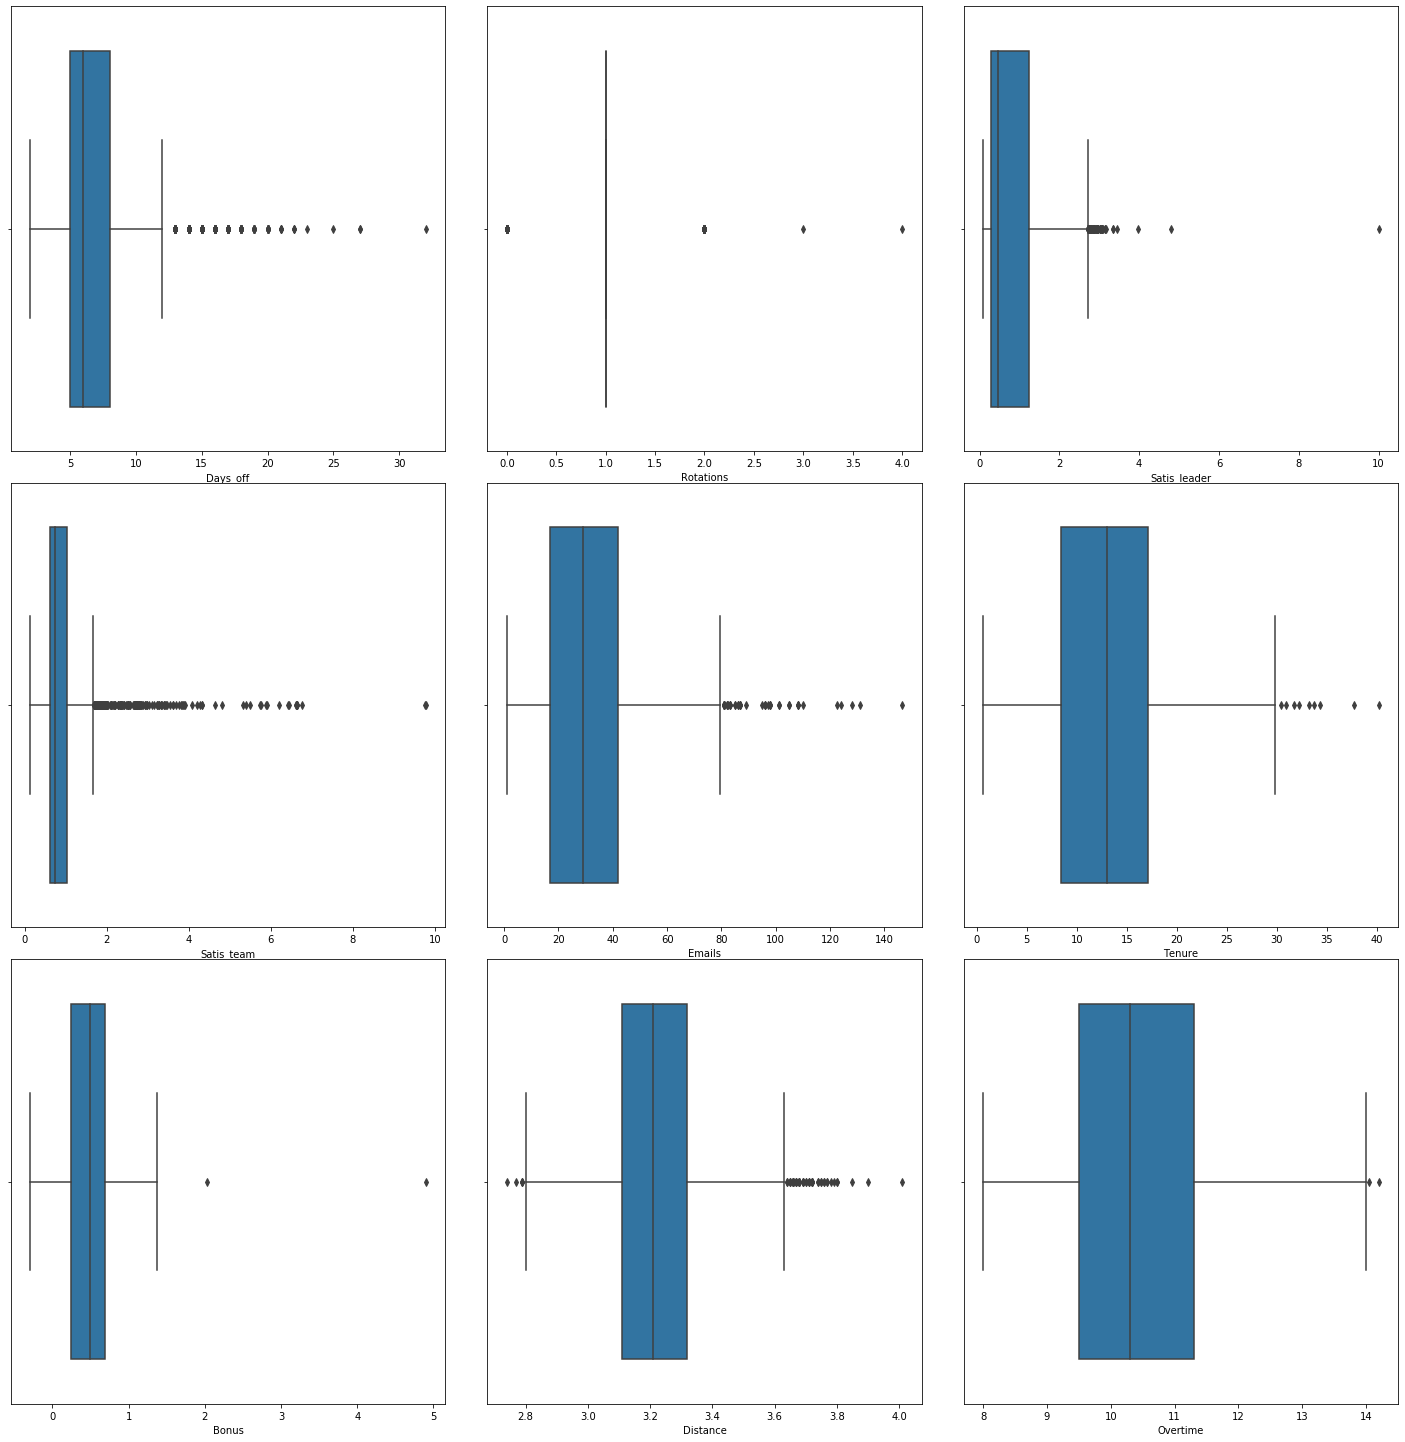

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(data_num, ax.flatten()):
    sns.boxplot(data_num[var], ax=subplot)

In [22]:
m = data[data.Churn_risk == "medium"].Churn_risk.count()
l = data[data.Churn_risk == "low"].Churn_risk.count()
h = data[data.Churn_risk == "high"].Churn_risk.count()

fig = go.Figure(go.Pie(labels=['Medium','Low','High'], values=[m, l,h]))
fig.update_layout(height=300, width=400, title_text='Churn Riks')
fig.show()

In [23]:
m = data[data.Churn_risk == "medium"][["Gender","Churn_risk"]].groupby(["Gender"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()
l = data[data.Churn_risk == "low"][["Gender","Churn_risk"]].groupby(["Gender"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()
h = data[data.Churn_risk == "high"][["Gender","Churn_risk"]].groupby(["Gender"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()

pf_group = m.merge(l, left_on= "Gender", right_on="Gender" ).head()
x=pf_group.Gender.values

fig = go.Figure(go.Bar(x=x, y=pf_group.Churn_risk_x, name='Medium'))
fig.add_trace(go.Bar(x=x, y=pf_group.Churn_risk_y, name='Low'))

pf_group = m.merge(h, left_on= "Gender", right_on="Gender" ).head()
x=pf_group.Gender.values
fig.add_trace(go.Bar(x=x, y=pf_group.Churn_risk_y, name='High'))

fig.update_layout(barmode='stack',height=400, width=400, title_text="Churn Risk by Gender")
fig.show()

In [24]:
m = data[data.Churn_risk == "medium"][["Marital_status","Churn_risk"]].groupby(["Marital_status"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index() 
l = data[data.Churn_risk == "low"][["Marital_status","Churn_risk"]].groupby(["Marital_status"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()
h = data[data.Churn_risk == "high"][["Marital_status","Churn_risk"]].groupby(["Marital_status"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()

pf_group = m.merge(l, left_on= "Marital_status", right_on="Marital_status" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Medium', x=pf_group['Marital_status'], y=pf_group['Churn_risk_x']),
    go.Bar(name='Low', x=pf_group['Marital_status'], y=pf_group['Churn_risk_y'])

]) 
pf_group = m.merge(h, left_on= "Marital_status", right_on="Marital_status" ).head()
fig.add_trace(go.Bar(name='High', x=pf_group['Marital_status'], y=pf_group['Churn_risk_y']))
# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Repeated VS. Not Repeated by Flight_Class", plot_bgcolor="white")
fig.show() 

In [25]:
m = data[data.Churn_risk == "medium"][["Department","Churn_risk"]].groupby(["Department"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index() 
l = data[data.Churn_risk == "low"][["Department","Churn_risk"]].groupby(["Department"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()
h = data[data.Churn_risk == "high"][["Department","Churn_risk"]].groupby(["Department"]).count().sort_values(by = "Churn_risk", ascending = False).reset_index()

pf_group = m.merge(l, left_on= "Department", right_on="Department" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Medium', x=pf_group['Department'], y=pf_group['Churn_risk_x']),
    go.Bar(name='Low', x=pf_group['Department'], y=pf_group['Churn_risk_y'])

]) 
pf_group = m.merge(h, left_on= "Department", right_on="Department" ).head()
fig.add_trace(go.Bar(name='High', x=pf_group['Department'], y=pf_group['Churn_risk_y']))
# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Repeated VS. Not Repeated by Flight_Class", plot_bgcolor="white")
fig.show() 

In [26]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Age, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Age, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Age, name="High")
])

fig.update_layout(title_text="Age in Churn")
fig.show() 

In [27]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Days_off, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Days_off, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Days_off, name="High")
])

fig.update_layout(title_text="Days_off in Churn")
fig.show() 

In [28]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Rotations, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Rotations, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Rotations, name="High")
])

fig.update_layout(title_text="Rotations in Churn")
fig.show() 

In [29]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Satis_leader,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Satis_leader,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Satis_leader,nbinsx=50, name="High")
])

fig.update_layout(title_text="Satis_leader in Churn")
fig.show() 

In [30]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Satis_team,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Satis_team,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Satis_team,nbinsx=50, name="High")
])

fig.update_layout(title_text="Satis_team in Churn")
fig.show() 

In [31]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Emails,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Emails,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Emails,nbinsx=50, name="High")
])

fig.update_layout(title_text="Emails in Churn")
fig.show() 

In [32]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Tenure,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Tenure,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Tenure,nbinsx=50, name="High")
])

fig.update_layout(title_text="Tenure in Churn")
fig.show() 

In [33]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Bonus,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Bonus,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Bonus,nbinsx=50, name="High")
])

fig.update_layout(title_text="Bonus in Churn")
fig.show() 

In [34]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Distance,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Distance,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Distance,nbinsx=50, name="High")
])

fig.update_layout(title_text="Distance in Churn")
fig.show() 

In [35]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Churn_risk == "medium"].Overtime,nbinsx=50, name="Medium"),
    go.Histogram(x=data[data.Churn_risk == "low"].Overtime,nbinsx=50, name="Low"),
    go.Histogram(x=data[data.Churn_risk == "high"].Overtime,nbinsx=50, name="High")
])

fig.update_layout(title_text="Overtime in Churn")
fig.show() 

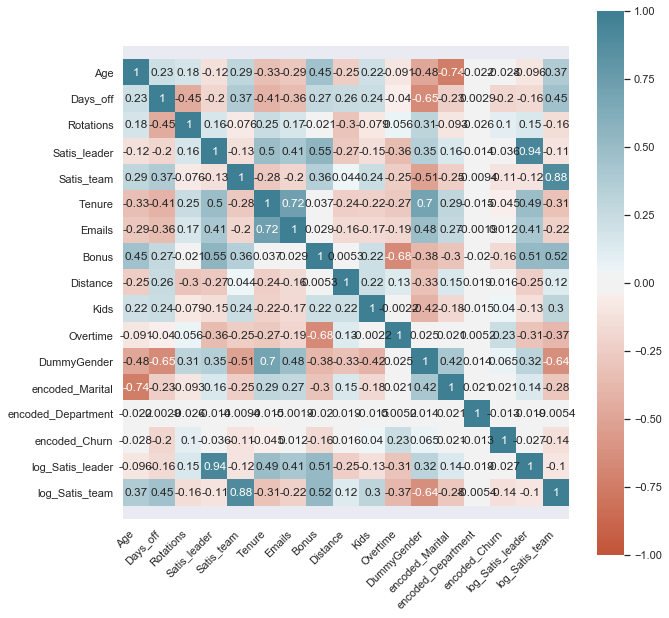

In [36]:
corr =data.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)

bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [37]:
data.corr()["encoded_Churn"].sort_values(ascending = False )

encoded_Churn         1.000000
Overtime              0.228538
Rotations             0.100513
DummyGender           0.064690
Kids                  0.040296
encoded_Marital       0.021250
Distance              0.015757
Emails                0.012250
encoded_Department   -0.013355
log_Satis_leader     -0.026789
Age                  -0.028121
Satis_leader         -0.036083
Tenure               -0.044936
Satis_team           -0.113207
log_Satis_team       -0.137234
Bonus                -0.156972
Days_off             -0.202152
Name: encoded_Churn, dtype: float64

In [42]:
data_num = data.loc[:,["Age","Days_off","Rotations","Satis_leader","Satis_team","Tenure","Emails","Bonus","Distance","Overtime"]]

data

Age  Days_off  Rotations  Satis_leader  Satis_team     Tenure  Emails  \
0     38.0       6.0        1.0      0.364742       0.832   1.095890     4.0   
1     37.0       8.0        1.0      0.379939       1.280  13.369863    26.0   
2     36.0       6.0        1.0      0.303951       1.104  14.684932    29.0   
3     27.0       5.0        1.0      0.273556       0.624  11.506849    30.0   
4     30.0       8.0        1.0      0.212766       2.272   7.561644     5.0   
...    ...       ...        ...           ...         ...        ...     ...   
5195  32.0       6.0        0.0      2.112462       0.752  17.753425    49.0   
5196  27.0       7.0        1.0      0.303951       0.480  15.561644    38.0   
5197  32.0       6.0        1.0      1.215805       0.720  13.479452    28.0   
5198  28.0       5.0        1.0      1.018237       0.656  25.205479    61.0   
5199  32.0      14.0        0.0      0.851064       1.984   6.356164    21.0   

      Bonus  Distance  Kids  ...  Gender Marital_status         Department  \
0     0.356      3.33   1.0  ...  female        married  computer services   
1     0.801      3.22   1.0  ...  female        married    human resources   
2     0.382      3.11   1.0  ...    male        married           finances   
3    -0.005      3.48   1.0  ...    male       together  computer services   
4     0.260      3.14   1.0  ...    male       together              sales   
...     ...       ...   ...  ...     ...            ...                ...   
5195  0.830      3.21   1.0  ...    male       together         accounting   
5196 -0.108      3.40   0.0  ...    male       together    human resources   
5197  0.280      3.02   0.0  ...    male       together    human resources   
5198  0.505      3.12   0.0  ...    male       together              sales   
5199  0.970      3.46   1.0  ...  female       together          marketing   

     Churn_risk DummyGender  encoded_Marital  encoded_Department  \
0        medium           0                0                   1   
1           low           0                0                   3   
2           low           1                0                   2   
3        medium           1                2                   1   
4           low           1                2                   5   
...         ...         ...              ...                 ...   
5195     medium           1                2                   0   
5196     medium           1                2                   3   
5197     medium           1                2                   3   
5198        low           1                2                   5   
5199        low           0                2                   4   

      encoded_Churn  log_Satis_leader  log_Satis_team  
0                 2         -1.008566       -0.183923  
1                 1         -0.967744        0.246860  
2                 1         -1.190888        0.098940  
3                 2         -1.296248       -0.471605  
4                 1         -1.547563        0.820661  
...             ...               ...             ...  
5195              2          0.747854       -0.285019  
5196              2         -1.190888       -0.733969  
5197              2          0.195407       -0.328504  
5198              1          0.018073       -0.421594  
5199              1         -0.161268        0.685115  

[5200 rows x 21 columns]

In [43]:
data.corr()["encoded_Churn"].sort_values(ascending = False )

encoded_Churn         1.000000
Overtime              0.228538
Rotations             0.100513
DummyGender           0.064690
Kids                  0.040296
encoded_Marital       0.021250
Distance              0.015757
Emails                0.012250
encoded_Department   -0.013355
log_Satis_leader     -0.026789
Age                  -0.028121
Satis_leader         -0.036083
Tenure               -0.044936
Satis_team           -0.113207
log_Satis_team       -0.137234
Bonus                -0.156972
Days_off             -0.202152
Name: encoded_Churn, dtype: float64

In [87]:
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

In [88]:
dt = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,19,20]]
target = data.iloc[:,-3]

print(dt.columns)
data.columns

Index(['Age', 'Days_off', 'Rotations', 'Satis_leader', 'Satis_team', 'Tenure',
       'Emails', 'Bonus', 'Distance', 'Kids', 'Overtime', 'DummyGender',
       'encoded_Marital', 'encoded_Department', 'log_Satis_leader',
       'log_Satis_team'],
      dtype='object')


Index(['Age', 'Days_off', 'Rotations', 'Satis_leader', 'Satis_team', 'Tenure',
       'Emails', 'Bonus', 'Distance', 'Kids', 'Overtime', 'Gender',
       'Marital_status', 'Department', 'Churn_risk', 'DummyGender',
       'encoded_Marital', 'encoded_Department', 'encoded_Churn',
       'log_Satis_leader', 'log_Satis_team'],
      dtype='object')

In [89]:
model = LinearRegression()
rfe = RFE(estimator = model)
X_rfe = rfe.fit_transform(X = dt, y = target) 
model.fit(X = X_rfe,y = target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True, False])

In [91]:
rfe.ranking_

array([9, 1, 3, 1, 1, 4, 8, 5, 1, 1, 1, 1, 6, 7, 1, 2])

In [92]:
selected_features = pd.Series(rfe.support_, index = dt.columns)
selected_features

Age                   False
Days_off               True
Rotations             False
Satis_leader           True
Satis_team             True
Tenure                False
Emails                False
Bonus                 False
Distance               True
Kids                   True
Overtime               True
DummyGender            True
encoded_Marital       False
encoded_Department    False
log_Satis_leader       True
log_Satis_team        False
dtype: bool

In [93]:
df= pd.concat([data_norm.loc[:,["Days_off","Satis_leader","Satis_team","Overtime"]], (data.loc[:,["DummyGender","Kids","log_Satis_leader"]]).reset_index(drop=True)], axis=1)
target = data["encoded_Churn"]

df

Days_off  Satis_leader  Satis_team  Overtime  DummyGender  Kids  \
0    -0.242243     -0.522890    0.076858  1.956815            0   1.0   
1     0.354188     -0.475676    1.076779 -0.658455            0   1.0   
2    -0.242243     -0.733760    0.733431 -0.574092            1   1.0   
3    -0.540458     -0.855618   -0.590902  1.703724            1   1.0   
4     0.354188     -1.146284    2.408669 -0.321001            1   1.0   
...        ...           ...         ...       ...          ...   ...   
5195 -0.242243      1.508556   -0.157803 -1.249000            1   1.0   
5196  0.055973     -0.733760   -1.199894  2.041178            1   0.0   
5197 -0.242243      0.869605   -0.258740  0.775725            1   0.0   
5198 -0.540458      0.664503   -0.474819 -1.333364            1   0.0   
5199  2.143481      0.457080    2.094044 -0.236638            0   1.0   

      log_Satis_leader  
0            -1.008566  
1            -0.967744  
2            -1.190888  
3            -1.296248  
4            -1.547563  
...                ...  
5195          0.747854  
5196         -1.190888  
5197          0.195407  
5198          0.018073  
5199         -0.161268  

[5200 rows x 7 columns]

In [94]:
X_train, X_val, y_train, y_val = train_test_split(df, target, test_size=0.25, random_state=5)

In [103]:
modelKNN = KNeighborsClassifier(n_neighbors = 31)

In [104]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [105]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)

In [106]:
modelKNN.score(X_train, y_train)

0.7364102564102564

In [107]:
modelKNN.score(X_val, y_val)

0.7207692307692307

In [108]:
le.inverse_transform(y_val)

array(['low', 'low', 'medium', ..., 'medium', 'low', 'low'], dtype=object)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

In [102]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 31


# Test Dataset

In [110]:
test = pd.read_csv('test.csv')

In [111]:
test_num = test.loc[:,["Days_off","Rotations","Satis_leader","Satis_team","Emails","Tenure","Bonus","Distance","Overtime"]]
imputer = KNNImputer(n_neighbors=2)
test_num = pd.DataFrame(imputer.fit_transform(test_num), columns=["Days_off","Rotations","Satis_leader","Satis_team","Emails","Tenure","Bonus","Distance","Overtime"])
test_num


Days_off  Rotations  Satis_leader  Satis_team  Emails     Tenure  Bonus  \
0          8.0        1.0      1.094225       0.752    41.0  16.547945  0.604   
1          3.0        1.0      0.699088       1.280    34.0  18.849315  0.380   
2          5.0        1.0      1.246201       0.608    72.0  22.136986  0.566   
3          5.0        1.0      1.048632       0.320    14.0  10.191781  0.390   
4          6.0        1.0      0.721884       0.528    23.0  10.301370  0.100   
...        ...        ...           ...         ...     ...        ...    ...   
1295       5.0        1.0      0.182371       0.752    25.0  11.945205  0.210   
1296       4.0        1.0      0.896657       0.864    40.0  16.657534  0.380   
1297       5.0        1.0      1.975684       0.816    72.0  19.397260  0.720   
1298       5.0        1.0      1.200608       0.720    54.0  22.794521  0.572   
1299      12.0        0.0      0.349544       1.280    27.0   4.712329  0.550   

      Distance  Overtime  
0         3.11       9.2  
1         3.23      11.1  
2         3.12      10.0  
3         3.00      10.7  
4         3.42      11.8  
...        ...       ...  
1295      3.23      12.5  
1296      3.20      10.8  
1297      3.16       9.8  
1298      3.17       9.1  
1299      3.42      10.7  

[1300 rows x 9 columns]

In [113]:
test["DummyGender"] = test.Gender.apply(lambda x: 1 if x=="male" else 0) #Male = 1 , Female = 0

le2 = preprocessing.LabelEncoder()
le2.fit(test['Marital_status'])
test["encoded_Marital"] = le2.transform(test['Marital_status'])

le2 = preprocessing.LabelEncoder()
le2.fit(test['Department'])
test["encoded_Department"] = le2.transform(test['Department'])

test['log_Satis_leader'] = np.log(test['Satis_leader'] )

test['log_Satis_team'] = np.log(test['Satis_team'] )

scaler = StandardScaler()
test_norm = pd.DataFrame(scaler.fit_transform(test_num), columns=test_num.columns)

df_test = pd.concat([test_norm.loc[:,["Days_off","Satis_leader","Satis_team","Overtime"]], (test.loc[:,["DummyGender","Kids","log_Satis_leader"]]).reset_index(drop=True)], axis=1)

In [114]:
labels_test = modelKNN.predict(df_test)
le.inverse_transform(labels_test)

test["Churn_risk"] = le.inverse_transform(labels_test)

csv = test.iloc[:,[0,-1]]
csv.to_csv('m20190932_versionKNNSS.csv',index=False)

In [115]:
a = pd.read_csv('m20190932_versionKNNSS.csv')
a

Employee_ID Churn_risk
0         1005201        low
1         1005202     medium
2         1005203     medium
3         1005204     medium
4         1005205     medium
...           ...        ...
1295      1006496     medium
1296      1006497     medium
1297      1006498        low
1298      1006499        low
1299      1006500     medium

[1300 rows x 2 columns]

In [116]:
m = a[a.Churn_risk == "medium"].Churn_risk.count()
l = a[a.Churn_risk == "low"].Churn_risk.count()
h = a[a.Churn_risk == "high"].Churn_risk.count()

fig = go.Figure(go.Pie(labels=['Medium','Low','High'], values=[m, l,h]))
fig.update_layout(height=300, width=400, title_text='Churn Riks')
fig.show()